In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix , classification_report
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
oil_df=pd.read_csv('oil.csv')
holiday_df=pd.read_csv('holidays_events.csv')
store_df=pd.read_csv('stores.csv')
transaction_df=pd.read_csv('transactions.csv')

In [3]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [5]:
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [6]:
store_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [7]:
holiday_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [8]:
transaction_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [9]:
holiday_df['date'] = pd.to_datetime(holiday_df['date'])
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
oil_df['date'] = pd.to_datetime(oil_df['date'])
transaction_df['date'] = pd.to_datetime(transaction_df['date'])

In [10]:
train_df['store_nbr'] = train_df['store_nbr'].astype(int)
test_df['store_nbr'] = test_df['store_nbr'].astype(int)
store_df['store_nbr'] = store_df['store_nbr'].astype(int)


In [11]:
train_df.date = pd.to_datetime(train_df.date)
train_df['year'] = train_df.date.dt.year
train_df['month']=train_df.date.dt.month
train_df['day'] = train_df.date.dt.day
train_df['dayofweek'] = train_df.date.dt.dayofweek
train_df['dayname'] = train_df.date.dt.strftime('%A')




In [ ]:
test_df.date = pd.to_datetime(test_df.date)
test_df['year'] = test_df.date.dt.year
test_df['month']=test_df.date.dt.month
test_df['day'] = test_df.date.dt.day
test_df['dayofweek'] = test_df.date.dt.dayofweek
test_df['dayname'] = test_df.date.dt.strftime('%A')

In [12]:
dataframes = {
    'train_df': train_df,
    'test_df':test_df,
    'transaction_df': transaction_df,
    'store_df': store_df,
    'oil_df': oil_df,
    'holiday_df': holiday_df
}

In [13]:
def check_missing_values(dataframes):
    for name, df in dataframes.items():
        print(f"\nChecking missing values in {name}:")
        missing_values = df.isnull().sum()
        missing_data = pd.DataFrame({'Missing Values': missing_values})
        print(missing_data[missing_data['Missing Values'] > 0])

In [14]:
check_missing_values(dataframes)


Checking missing values in train_df:
Empty DataFrame
Columns: [Missing Values]
Index: []

Checking missing values in test_df:
Empty DataFrame
Columns: [Missing Values]
Index: []

Checking missing values in transaction_df:
Empty DataFrame
Columns: [Missing Values]
Index: []

Checking missing values in store_df:
Empty DataFrame
Columns: [Missing Values]
Index: []

Checking missing values in oil_df:
            Missing Values
dcoilwtico              43

Checking missing values in holiday_df:
Empty DataFrame
Columns: [Missing Values]
Index: []


In [15]:
def check_duplicates(dataframes):
    for name, df in dataframes.items():
        duplicates = df[df.duplicated()]
        print(f"\nChecking duplicates in {name.capitalize()} dataset:")
        if duplicates.empty:
            print("No duplicates found.")
        else:
            print(f"Number of duplicate rows: {duplicates.shape[0]}")
            print(duplicates)
        print("*" * 40)

In [16]:
check_duplicates(dataframes)



Checking duplicates in Train_df dataset:
No duplicates found.
****************************************

Checking duplicates in Test_df dataset:
No duplicates found.
****************************************

Checking duplicates in Transaction_df dataset:
No duplicates found.
****************************************

Checking duplicates in Store_df dataset:
No duplicates found.
****************************************

Checking duplicates in Oil_df dataset:
No duplicates found.
****************************************

Checking duplicates in Holiday_df dataset:
No duplicates found.
****************************************


In [17]:
def print_shapes(dfs):
    for name, df in dfs.items():
        print(f"Shape of {name} DataFrame: {df.shape}")

In [18]:
print_shapes(dataframes)

Shape of train_df DataFrame: (3000888, 12)
Shape of test_df DataFrame: (28512, 11)
Shape of transaction_df DataFrame: (83488, 3)
Shape of store_df DataFrame: (54, 5)
Shape of oil_df DataFrame: (1218, 2)
Shape of holiday_df DataFrame: (350, 6)


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int32         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   year         int64         
 7   month        int64         
 8   day          int64         
 9   dayofweek    int64         
 10  dayname      object        
 11  is_weekend   int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(7), object(2)
memory usage: 263.3+ MB


In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int32         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
 5   year         28512 non-null  int64         
 6   month        28512 non-null  int64         
 7   day          28512 non-null  int64         
 8   dayofweek    28512 non-null  int64         
 9   dayname      28512 non-null  object        
 10  is_weekend   28512 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(7), object(2)
memory usage: 2.3+ MB


In [21]:
train_df.describe()

,id,store_nbr,sales,onpromotion,year,month,day,dayofweek,is_weekend
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00,2.014838e+03,6.207838e+00,1.563005e+01,2.997031e+00,2.856295e-01
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01,1.345518e+00,3.385668e+00,8.794789e+00,2.000740e+00,4.517138e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00,2.014000e+03,3.000000e+00,8.000000e+00,1.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00,2.015000e+03,6.000000e+00,1.600000e+01,3.000000e+00,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00,2.016000e+03,9.000000e+00,2.300000e+01,5.000000e+00,1.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,2.017000e+03,1.200000e+01,3.100000e+01,6.000000e+00,1.000000e+00


In [22]:
test_df.describe()

,id,store_nbr,onpromotion,year,month,day,dayofweek,is_weekend
count,2.851200e+04,28512.000000,28512.000000,28512.0,28512.0,28512.000000,28512.000000,28512.00000
mean,3.015144e+06,27.500000,6.965383,2017.0,8.0,23.500000,2.937500,0.25000
std,8.230850e+03,15.586057,20.683952,0.0,0.0,4.609853,1.886457,0.43302
min,3.000888e+06,1.000000,0.000000,2017.0,8.0,16.000000,0.000000,0.00000
25%,3.008016e+06,14.000000,0.000000,2017.0,8.0,19.750000,1.750000,0.00000
50%,3.015144e+06,27.500000,0.000000,2017.0,8.0,23.500000,3.000000,0.00000
75%,3.022271e+06,41.000000,6.000000,2017.0,8.0,27.250000,4.250000,0.25000
max,3.029399e+06,54.000000,646.000000,2017.0,8.0,31.000000,6.000000,1.00000


In [23]:
holiday_df['is_holiday'] = holiday_df['type'].apply(lambda x: 1 if x == 'Holiday' else 0)
holiday_df['is_holiday'] = holiday_df.apply(lambda row: 0 if row['transferred'] else row['is_holiday'], axis=1)
holiday_df=holiday_df.drop(columns=['type'])

In [24]:
train_df = pd.merge(train_df,holiday_df, on='date', how='left')
test_df = pd.merge(test_df,holiday_df, on='date', how='left')


In [25]:

train_df = pd.merge(train_df,oil_df, on='date', how='left')
test_df = pd.merge(test_df,oil_df, on='date', how='left')

train_df

,id,date,store_nbr,family,sales,onpromotion,year,month,day,dayofweek,dayname,is_weekend,locale,locale_name,description,transferred,is_holiday,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1,1,Tuesday,0,National,Ecuador,Primer dia del ano,False,1.0,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,2013,1,1,1,Tuesday,0,National,Ecuador,Primer dia del ano,False,1.0,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,2013,1,1,1,Tuesday,0,National,Ecuador,Primer dia del ano,False,1.0,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,1,1,Tuesday,0,National,Ecuador,Primer dia del ano,False,1.0,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,2013,1,1,1,Tuesday,0,National,Ecuador,Primer dia del ano,False,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,15,1,Tuesday,0,Local,Riobamba,Fundacion de Riobamba,False,1.0,47.57
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,15,1,Tuesday,0,Local,Riobamba,Fundacion de Riobamba,False,1.0,47.57
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,15,1,Tuesday,0,Local,Riobamba,Fundacion de Riobamba,False,1.0,47.57
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15,1,Tuesday,0,Local,Riobamba,Fundacion de Riobamba,False,1.0,47.57


In [26]:
train_df = pd.merge(train_df,store_df,how='left',on='store_nbr')
test_df = pd.merge(test_df,store_df,how='left',on='store_nbr')


In [27]:
train_df=train_df.dropna()
train_df

,id,date,store_nbr,family,sales,onpromotion,year,month,day,dayofweek,...,locale,locale_name,description,transferred,is_holiday,dcoilwtico,city,state,type,cluster
73062,73062,2013-02-11,1,AUTOMOTIVE,0.000,0,2013,2,11,0,...,National,Ecuador,Carnaval,False,1.0,97.01,Quito,Pichincha,D,13
73063,73063,2013-02-11,1,BABY CARE,0.000,0,2013,2,11,0,...,National,Ecuador,Carnaval,False,1.0,97.01,Quito,Pichincha,D,13
73064,73064,2013-02-11,1,BEAUTY,0.000,0,2013,2,11,0,...,National,Ecuador,Carnaval,False,1.0,97.01,Quito,Pichincha,D,13
73065,73065,2013-02-11,1,BEVERAGES,172.000,0,2013,2,11,0,...,National,Ecuador,Carnaval,False,1.0,97.01,Quito,Pichincha,D,13
73066,73066,2013-02-11,1,BOOKS,0.000,0,2013,2,11,0,...,National,Ecuador,Carnaval,False,1.0,97.01,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,15,1,...,Local,Riobamba,Fundacion de Riobamba,False,1.0,47.57,Quito,Pichincha,B,6
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,15,1,...,Local,Riobamba,Fundacion de Riobamba,False,1.0,47.57,Quito,Pichincha,B,6
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,15,1,...,Local,Riobamba,Fundacion de Riobamba,False,1.0,47.57,Quito,Pichincha,B,6
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15,1,...,Local,Riobamba,Fundacion de Riobamba,False,1.0,47.57,Quito,Pichincha,B,6


In [28]:
test_df=test_df.dropna()


In [29]:
train_df = pd.merge(train_df,transaction_df, on='date', how='left')



In [30]:
test_df = pd.merge(test_df,transaction_df, on='date', how='left')


In [31]:
train_df

,id,date,store_nbr_x,family,sales,onpromotion,year,month,day,dayofweek,...,description,transferred,is_holiday,dcoilwtico,city,state,type,cluster,store_nbr_y,transactions
0,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,2013,2,11,0,...,Carnaval,False,1.0,97.01,Quito,Pichincha,D,13,1,396
1,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,2013,2,11,0,...,Carnaval,False,1.0,97.01,Quito,Pichincha,D,13,2,1486
2,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,2013,2,11,0,...,Carnaval,False,1.0,97.01,Quito,Pichincha,D,13,3,2532
3,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,2013,2,11,0,...,Carnaval,False,1.0,97.01,Quito,Pichincha,D,13,4,1263
4,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,2013,2,11,0,...,Carnaval,False,1.0,97.01,Quito,Pichincha,D,13,5,1029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16200157,3000887,2017-08-15,9,SEAFOOD,16.0,0,2017,8,15,1,...,Fundacion de Riobamba,False,1.0,47.57,Quito,Pichincha,B,6,50,2804
16200158,3000887,2017-08-15,9,SEAFOOD,16.0,0,2017,8,15,1,...,Fundacion de Riobamba,False,1.0,47.57,Quito,Pichincha,B,6,51,1573
16200159,3000887,2017-08-15,9,SEAFOOD,16.0,0,2017,8,15,1,...,Fundacion de Riobamba,False,1.0,47.57,Quito,Pichincha,B,6,52,2255
16200160,3000887,2017-08-15,9,SEAFOOD,16.0,0,2017,8,15,1,...,Fundacion de Riobamba,False,1.0,47.57,Quito,Pichincha,B,6,53,932


In [32]:
test_df

,id,date,store_nbr_x,family,onpromotion,year,month,day,dayofweek,dayname,...,description,transferred,is_holiday,dcoilwtico,city,state,type,cluster,store_nbr_y,transactions
0,3015144,2017-08-24,1,AUTOMOTIVE,0,2017,8,24,3,Thursday,...,Fundacion de Ambato,False,1.0,47.24,Quito,Pichincha,D,13,NaN,NaN
1,3015145,2017-08-24,1,BABY CARE,0,2017,8,24,3,Thursday,...,Fundacion de Ambato,False,1.0,47.24,Quito,Pichincha,D,13,NaN,NaN
2,3015146,2017-08-24,1,BEAUTY,0,2017,8,24,3,Thursday,...,Fundacion de Ambato,False,1.0,47.24,Quito,Pichincha,D,13,NaN,NaN
3,3015147,2017-08-24,1,BEVERAGES,26,2017,8,24,3,Thursday,...,Fundacion de Ambato,False,1.0,47.24,Quito,Pichincha,D,13,NaN,NaN
4,3015148,2017-08-24,1,BOOKS,0,2017,8,24,3,Thursday,...,Fundacion de Ambato,False,1.0,47.24,Quito,Pichincha,D,13,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,3016921,2017-08-24,9,POULTRY,0,2017,8,24,3,Thursday,...,Fundacion de Ambato,False,1.0,47.24,Quito,Pichincha,B,6,NaN,NaN
1778,3016922,2017-08-24,9,PREPARED FOODS,0,2017,8,24,3,Thursday,...,Fundacion de Ambato,False,1.0,47.24,Quito,Pichincha,B,6,NaN,NaN
1779,3016923,2017-08-24,9,PRODUCE,3,2017,8,24,3,Thursday,...,Fundacion de Ambato,False,1.0,47.24,Quito,Pichincha,B,6,NaN,NaN
1780,3016924,2017-08-24,9,SCHOOL AND OFFICE SUPPLIES,9,2017,8,24,3,Thursday,...,Fundacion de Ambato,False,1.0,47.24,Quito,Pichincha,B,6,NaN,NaN


In [33]:
train_df.isnull().sum()

id              0
date            0
store_nbr_x     0
family          0
sales           0
onpromotion     0
year            0
month           0
day             0
dayofweek       0
dayname         0
is_weekend      0
locale          0
locale_name     0
description     0
transferred     0
is_holiday      0
dcoilwtico      0
city            0
state           0
type            0
cluster         0
store_nbr_y     0
transactions    0
dtype: int64

In [34]:
test_df.isnull().sum()

id                 0
date               0
store_nbr_x        0
family             0
onpromotion        0
year               0
month              0
day                0
dayofweek          0
dayname            0
is_weekend         0
locale             0
locale_name        0
description        0
transferred        0
is_holiday         0
dcoilwtico         0
city               0
state              0
type               0
cluster            0
store_nbr_y     1782
transactions    1782
dtype: int64

In [35]:
data_encoder={
    "family_encoder":train_df['family'],
    'dayname_encoder':train_df['dayname'],
    'city_encoder':train_df['city'],
    'state_encoder':train_df['state'],
    'store_type_encoder':train_df['type'],
    'local_encoder':train_df['locale'],
    'locale_name_encoder':train_df['locale_name'],
    'description_encoder':train_df['description'],
    'transferred_encoder':train_df['transferred']

}
data_encoderr={
    "family_encoder":test_df['family'],
    'dayname_encoder':test_df['dayname'],
    'city_encoder':test_df['city'],
    'state_encoder':test_df['state'],
    'store_type_encoder':test_df['type'],
    'local_encoder':test_df['locale'],
    'locale_name_encoder':test_df['locale_name'],
    'description_encoder':test_df['description'],
    'transferred_encoder':test_df['transferred']

}

In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for name,value in data_encoder.items():
  train_df[name] = label_encoder.fit_transform(value)


train_df

,id,date,store_nbr_x,family,sales,onpromotion,year,month,day,dayofweek,...,transactions,family_encoder,dayname_encoder,city_encoder,state_encoder,store_type_encoder,local_encoder,locale_name_encoder,description_encoder,transferred_encoder
0,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,2013,2,11,0,...,396,0,1,18,12,3,1,4,11,0
1,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,2013,2,11,0,...,1486,0,1,18,12,3,1,4,11,0
2,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,2013,2,11,0,...,2532,0,1,18,12,3,1,4,11,0
3,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,2013,2,11,0,...,1263,0,1,18,12,3,1,4,11,0
4,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,2013,2,11,0,...,1029,0,1,18,12,3,1,4,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16200157,3000887,2017-08-15,9,SEAFOOD,16.0,0,2017,8,15,1,...,2804,32,3,18,12,1,0,19,26,0
16200158,3000887,2017-08-15,9,SEAFOOD,16.0,0,2017,8,15,1,...,1573,32,3,18,12,1,0,19,26,0
16200159,3000887,2017-08-15,9,SEAFOOD,16.0,0,2017,8,15,1,...,2255,32,3,18,12,1,0,19,26,0
16200160,3000887,2017-08-15,9,SEAFOOD,16.0,0,2017,8,15,1,...,932,32,3,18,12,1,0,19,26,0


In [105]:
for name,value in data_encoderr.items():
   test_df[name] = label_encoder.fit_transform(value)

test_df=test_df.drop(columns=['transactions','store_nbr_y'])
test_df

KeyError: "['transactions' 'store_nbr_y'] not found in axis"

In [106]:
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()


In [57]:
train_df.corr()['sales']

id                     0.071870
store_nbr_x            0.038392
sales                  1.000000
onpromotion            0.415940
year                   0.064240
month                  0.024359
day                    0.004572
dayofweek             -0.001426
is_weekend                  NaN
is_holiday            -0.034635
dcoilwtico            -0.073275
cluster                0.035888
store_nbr_y            0.000934
transactions           0.020986
family_encoder        -0.101123
dayname_encoder       -0.009678
city_encoder           0.046509
state_encoder          0.064947
store_type_encoder    -0.087666
local_encoder          0.017814
locale_name_encoder   -0.015684
description_encoder    0.026418
transferred_encoder   -0.004854
Name: sales, dtype: float64

In [58]:
train_df.columns

Index(['id', 'date', 'store_nbr_x', 'family', 'sales', 'onpromotion', 'year',
       'month', 'day', 'dayofweek', 'dayname', 'is_weekend', 'locale',
       'locale_name', 'description', 'transferred', 'is_holiday', 'dcoilwtico',
       'city', 'state', 'type', 'cluster', 'store_nbr_y', 'transactions',
       'family_encoder', 'dayname_encoder', 'city_encoder', 'state_encoder',
       'store_type_encoder', 'local_encoder', 'locale_name_encoder',
       'description_encoder', 'transferred_encoder'],
      dtype='object')

In [96]:
test_df.columns

Index(['id', 'date', 'store_nbr_x', 'family', 'onpromotion', 'year', 'month',
       'day', 'dayofweek', 'dayname', 'is_weekend', 'locale', 'locale_name',
       'description', 'transferred', 'is_holiday', 'dcoilwtico', 'city',
       'state', 'type', 'cluster', 'family_encoder', 'dayname_encoder',
       'city_encoder', 'state_encoder', 'store_type_encoder', 'local_encoder',
       'locale_name_encoder', 'description_encoder', 'transferred_encoder'],
      dtype='object')

In [108]:
x=train_df[[ 'store_nbr_x',  'onpromotion', 'year','month', 'day', 'dayofweek',  'is_holiday', 'dcoilwtico', 'cluster', 
       'family_encoder', 'dayname_encoder', 'city_encoder', 'state_encoder','store_type_encoder', 'local_encoder', 'locale_name_encoder',
       'description_encoder', 'transferred_encoder']]
y=train_df['sales']





In [113]:
X_test_final = test_df
X_test_final=X_test_final[x.columns]


,store_nbr_x,onpromotion,year,month,day,dayofweek,is_holiday,dcoilwtico,cluster,family_encoder,dayname_encoder,city_encoder,state_encoder,store_type_encoder,local_encoder,locale_name_encoder,description_encoder,transferred_encoder
0,1,0,2017,8,24,3,1.0,47.24,13,0,0,18,12,3,0,0,0,0
1,1,0,2017,8,24,3,1.0,47.24,13,1,0,18,12,3,0,0,0,0
2,1,0,2017,8,24,3,1.0,47.24,13,2,0,18,12,3,0,0,0,0
3,1,26,2017,8,24,3,1.0,47.24,13,3,0,18,12,3,0,0,0,0
4,1,0,2017,8,24,3,1.0,47.24,13,4,0,18,12,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,9,0,2017,8,24,3,1.0,47.24,6,28,0,18,12,1,0,0,0,0
1778,9,0,2017,8,24,3,1.0,47.24,6,29,0,18,12,1,0,0,0,0
1779,9,3,2017,8,24,3,1.0,47.24,6,30,0,18,12,1,0,0,0,0
1780,9,9,2017,8,24,3,1.0,47.24,6,31,0,18,12,1,0,0,0,0


In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (11340113, 18) (11340113,)
Test set: (4860049, 18) (4860049,)


In [115]:

input=[('polynomial',PolynomialFeatures(degree=2)),('scale',StandardScaler()),('model', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1,
 max_depth=6))]
pipe=Pipeline(input)

In [116]:
x_train_sample = x_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.sample(frac=0.1, random_state=42)
x_test = x_test.sample(frac=0.1, random_state=42)
y_test = y_test.sample(frac=0.1, random_state=42)
pipe.fit(x_train_sample,y_train_sample)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('scale', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [117]:
yhat=pipe.predict(x_test)
yhat

array([ -20.891344,  613.79663 ,  266.69223 , ...,  197.08777 ,
       4276.529   ,   35.476917], dtype=float32)

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, yhat)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")



MAE: 136.22544084135944
MSE: 161793.68900245527
R²: 0.8847536819372273


In [120]:
sales_predictions = pipe.predict(X_test_final)
sales_predictions

array([ -26.395163,  -27.172476,  -14.276425, ..., 2595.8875  ,
         19.520174,   27.891977], dtype=float32)

In [123]:
submission = pd.DataFrame({
    'id': test_df['id'],  
    'sales': sales_predictions
})
submission.to_csv('submission111.csv', index=False)


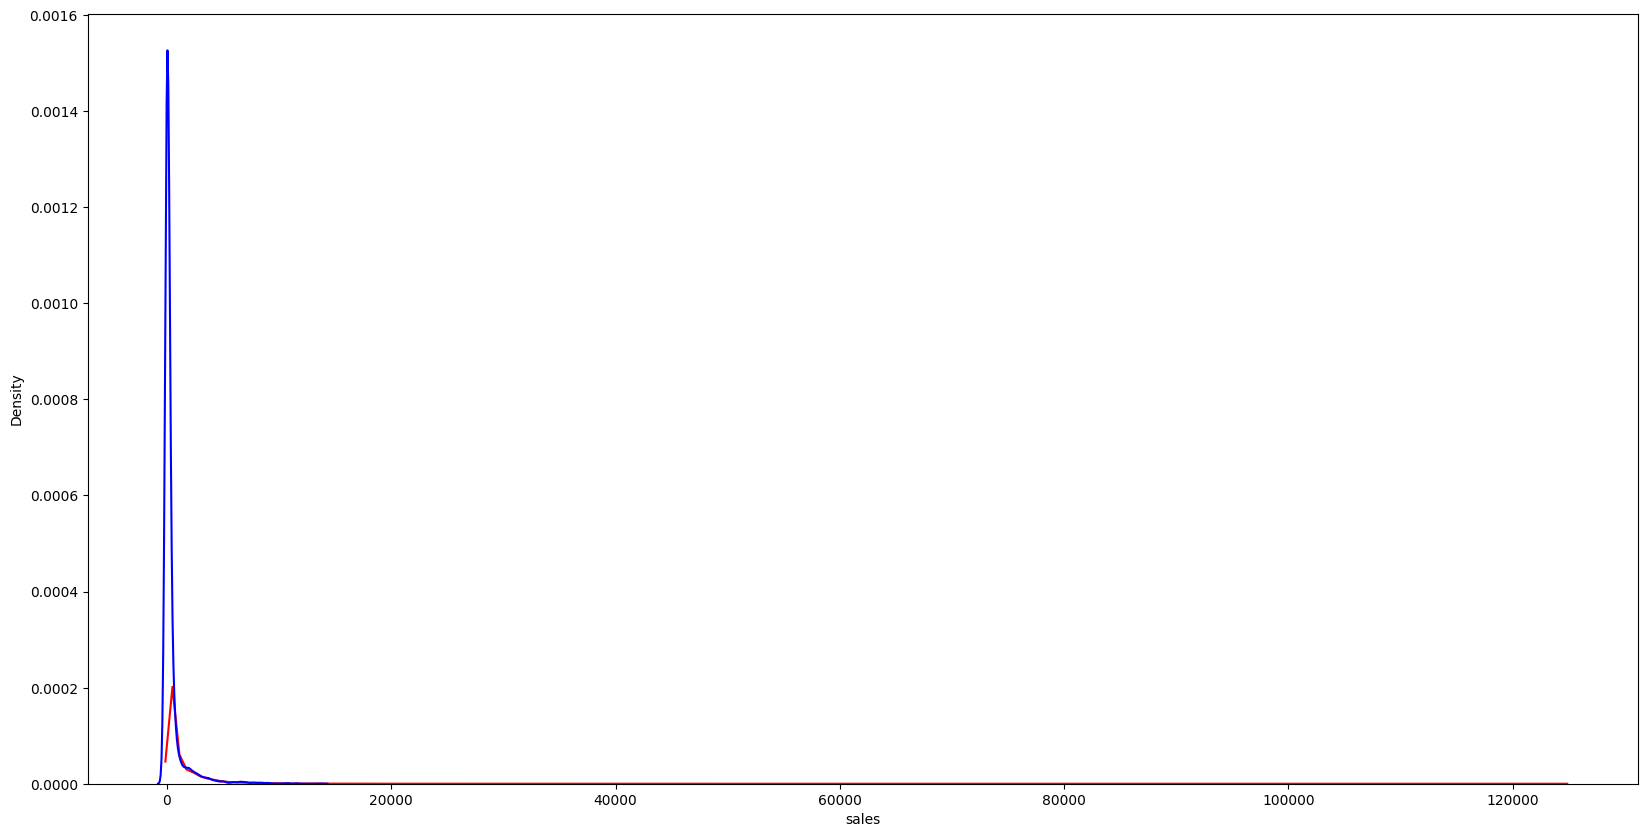

In [94]:
plt.figure(figsize=(20,10))  
ax1 = sns.kdeplot(y, color="r", label="Actual Value")
sns.kdeplot(yhat, color="b", label="Fitted Values" , ax=ax1)


plt.show()
plt.close()